# Ανάλυση Δεδομένων - Εφαρμογή στην Αστροφυσική

## 1. Ανάλυση του εξωπλανήτη  *51 Peg b*

### Θεωρητικό υπόβαθρο

Σε αυτό το πρόβλημα, θα εξετάσουμε ένα σύνολο δεδομένων που περιέχει την *ακτινική ταχύτητα* ενός αστέρα για διάφορα χρονικά σημεία. Η ακτινική ταχύτητα είναι η ταχύτητα με την οποία ένας αστέρας πλησιάζει ή απομακρύνεται από εμάς (θετικές τιμές ταχύτητας υποδηλώνουν ότι ο αστέρας απομακρύνεται από εμάς).


Εάν ένας αστέρας δεν είναι κοντά σε κάποιο άλλο αντικειμένο, τότε δεν υπάρχει κάποιος λόγος η ακτινική ταχύτητα του αστέρα να αλλάζει με τον χρόνο. Στη περίπτωση, όμως, όπου ένα δεύτερο αντικείμενο βρίσκεται σε τροχιά γύρω από τον αστέρα (π.χ. ένας πλανήτης ή ένας συνοδός αστέρας), τότε τόσο ο αστέρας όσο και το αντικείμενο θα βρίσκονται σε τροχιά γύρω από το κέντρο μάζας του διπλού συστήματος. Έτσι, η ακτινική ταχύτητα του αστέρα θα παρουσιάζει διακυμάνσεις με την πάροδο του χρόνου. Αυτές οι αλλαγές στην ταχύτητα προκαλούν μία μετατόπιση στις φασματικές γραμμές, λόγω του φαινομένου Doppler, την οποία μπορούμε να μετρήσουμε με επίγεια τηλεσκόπια τα οποία είναι εξοπλισμένα με φασματογράφους. Τέτοιες φασματοσκοπικές αναλύσεις γίνονται για παράδειγμα στο αστεροσκοπείο του Σκίνακα.

Όσο πιο μικρό είναι το δεύτερο αντικείμενο, τόσο μικρότερη είναι η επίδρασή του στον αστέρα. Για παράδειγμα, η ταχύτητα του Ήλιου επηρεάζεται από την παρουσία της Γης κατά 0.1 m/s σε περίοδο ενός χρόνου.


Μπορείτε να δείτε το παρακάτω video ώστε να πάρετε μια ιδέα του πως η παρουσία ενός μεγάλου πλανήτη σε τροχιά γύρω από το άστρο του επηρεάζει τις παρατηρούμενες φασματικές γραμμές του αστέρα:

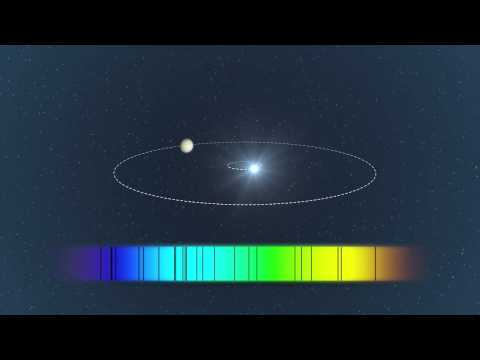

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("-BuwWtMygxU")

Για τους λόγους που αναλύθηκαν παραπάνω, η μέτρηση της ακτινικής ταχύτητας των αστέρων με πολύ μεγάλη ακρίβεια μπορεί να χρησιμοποιηθεί για την ανίχνευση πλανητών. Σε αυτό το σημείο πρέπει να αναφέρουμε ότι η μέτρηση της ταχύτητας των εξωπλανητών δεν είναι καθόλου εύκολη υπόθεση καθώς είναι πολύ πιο αμυδρά αντικείμενα από τους αστέρες.

Σε αυτό το πρόβλημα, θέλουμε να εξετάσουμε εάν ένας συγκεκριμένος αστέρας έχει κάποιο συνοδό αντικείμενο. Αν ναι, τότε θέλουμε να εκτιμήσουμε την μάζα του και να αποφανθούμε αν αυτό το αντικείμενο είναι πλανήτης ή κάτι άλλο. Το σύνολο δεδομένων για αυτή την άσκηση είναι το ``UID_0113357_RVC_001.tbl``. Τα δεδομένα πάρθηκαν από το [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/overview/51%20Peg%20b#planet_51-Peg-b_collapsible). Η πρώτη στήλη είναι ο χρόνος (σε ημέρες), η δεύτερη στήλη είναι η ακτινική ταχύτητα (σε m/s) και η τρίτη στήλη είναι η αβεβαιότητα στην ακτινική ταχύτητα (σε m/s). Μπορείτε να αγνοήσετε την τέταρτη στήλη.

---

### 1.1 Εκτίμηση της ακτινικής ταχύτητας του αστέρα

Για αρχή, θέλουμε να δούμε αν ο αστέρας παρουσιάζει όντως περιοδικές μεταβολές, και αν ναι, θέλουμε να μετρήσουμε την περίοδο και το πλάτος τους. Το πλάτος είναι μία άμεση μέτρηση της ακτινικής ταχύτητας.


1. Διαβάστε τα δεδομένα και κάντε ένα γράφημα της ακτινικής ταχύτητας που υπάρχει στο αρχείο των δεδομένων. Σιγουρευτείτε ότι το γράφημα συνοδεύεται από κατάλληλα ονόματα για τους άξονες, μονάδες μέτρησης και error bars!

   Όπως θα δείτε, οι παρατηρήσεις δεν πάρθηκαν με την ίδια χρονική απόσταση η μία με την άλλη, οπότε δεν είναι εύκολο να διακρίνουμε κάποια περιοδική μεταβολή στην καμπύλη με μια απλή οπτική εξέταση. Γι' αυτό το λόγο θα χρησιμοποιήσουμε μία αυτοματοποιημένη μέθοδο. Ο καλύτερος τρόπος για να βρούμε την περίοδο μιας χρονοσειράς όπως αυτή είναι να χρησιμοποιήσουμε ένα **περιοδόγραμμα**. Ένας τέτοιος αλγόριθμος που δουλεύει καλά στη περίπτωσή μας είναι ο ακόλουθος:

<div style="background-color:rgba(243, 148, 40, 0.05)">
<br>
    
- Διαλέξτε μία τιμή για την ``περίοδο``.


- Υπολογίστε τη φάση της καμπύλης της ακτινικής ταχύτητας:
    
> phase = (time % period) / period
        
        
- Ταξινομείστε τη φάση και την ταχύτητα σύμφωνα με τη φάση.


- Βρείτε το μήκος της γραμμής που ενώνει όλα τα σημεία, από αριστερά προς τα δεξιά. Αν γράψουμε την ταξινομημένη φάση ως $\phi$, την ταχύτητα ως $v$, και τον αριθμό των σημείων ως $N$, τότε αυτό το μήκος είναι: $$l = \sum_{i}^{N-1} \sqrt{\left(\phi_{i+1} - \phi_i \right)^2 + \left(v_{i+1} - v_i \right)^2}$$ **Σημείωση**: Θεωρείστε τη φάση, την ταχύτητα και το μήκος στον παραπάνω τύπο ως αδιάστατες ποσότητες.



- Επαναλάβετε για διάφορες δοκιμαστικές τιμές της περιόδου και βρείτε το ελάχιστο μήκος, $l$, και σε ποιά περίοδο αντιστοιχεί.<br><br>
</div>


2. **Υλοποιήστε τον παραπάνω αλγόριθμο** προσπαθώντας να βρείτε το μήκος της γραμμής για 10,000 περιόδους οι οποίες είναι κατανεμημένες λογαριθμικά μεταξύ 1 και 100 ημέρες. 

    *Προσοχή*: Ιδανικά, ο υπολογισμός του μήκους της γραμμής **δεν** πρέπει να γίνεται με κάποιο βρόγχο καθώς ο κώδικας θα είναι σχετικά αργός. Αντί για κάποιον βρόγχο, δοκιμάστε να εκμεταλευτείτε την διανυσματικοποίηση που μας προσφέρει η βιβλιοθήκη ``NumPy`` κάνοντας χρήσης της μεθόδου ``numpy.diff``. 

    Μπορείτε όμως να χρησιμοποιήσετε κάποιον βρόγχο για τις περιόδους.

   Υπόδειξη: εάν θέλετε να ταξινομήσετε κάποιο array ``y`` σύμφωνα με τις τιμές ενός array ``x``, μπορείτε να χρησιμοποιήσετε τη μέθοδο ``numpy.argsort``:

  > y_sorted = y[numpy.argsort(x)]
       
       
       
3. **Φτιάξτε ένα log-log διάγραμμα** του μήκους της γραμμής ως συνάρτηση της περιόδου και περιγράψτε το γράφημα. Αυτό είναι το περιοδόγραμμα. Θα πρέπει να είστε σε θέση να διακρίνετε κάποια ελάχιστα. Βρείτε την περίοδο του πρώτου καθαρού ελαχίστου.



4. Έχοντας βρει την περίοδο, αναδιπλώστε τα δεδομένα σε αυτή την τιμή της περιόδου (period folding). Με άλλα λόγια, **φτιάξτε ένα διάγραμμα** της ταξινομημένης ακτινικής ταχύτητας (με error bars) ως συνάρτηση της ταξινομημένης φάσης της περιόδου που βρήκατε παραπάνω. Εάν η ανάλυσή σας είναι σωστή, θα πρέπει να δείτε κάτι που μοιάζει με μία περίοδο της συνάρτησης του ημιτόνου. Αυτό σημαίνει ότι υπάρχουν όντως περιοδικές (και μάλιστα ημιτονοειδής) μεταβολές στην καμπύλη της ακτινική ταχύτητας, κάτι που υποδηλώνει ότι μάλλον υπάρχει και κάποιο άλλο αντικείμενο σε τροχιά γύρω από τον αστέρα! 
       
       
5. **Προσαρμόστε μία συνάρτηση** της μορφής: $$f(x) = a \sin(2\pi x + b)$$

    στο διάγραμμα της ακτινικής ταχύτητας - φάσης και **φτιάξτε ένα γράφημα** όπου φαίνεται το αρχικό διάγραμμα μαζί με την προσαρμοσμένη καμπύλη.

    Η παράμετρος $a$, θα σας δώσει το πλάτος της καμπύλης της ακτινικής ταχύτητας (εάν σας δίνει αρνητική τιμή, μετατρέψτε την σε θετική για το επόμενο κομμάτι). **Βρείτε την αβεβαιότητα** στη παράμετρο $a$ κάνοντας χρήση του πίνακα συνδιακύμανσης (covariance matrix) που επιστρέφεται από τη συνάρτηση προσαρμογής.

    Αν ακολουθήσατε όλα τα βήματα και κάνατε σωστή ανάλυση, θα πρέπει να έχετε στη διάθεσή σας την περίοδο και το πλάτος (μαζί με την αβεβαιότητα) της καμπύλης της ακτινικής ταχύτητας!

### 1.2 Εκτίμηση της μάζας του εξωπλανήτη *51 Peg b*

Στο προηγούμενο μέρος βρήκαμε ότι η καμπύλη της ακτινικής ταχύτητας του άστρου 51 Pegasi μπορεί να προσεγγιστεί από μία ημιτονοειδής καμπύλη, κάτι που υποδηλώνει ότι υπάρχει ένα αόρατο αντικείμενο σε κυκλική τροχιά γύρω από το άστρο. Σε αυτό το μέρος, θα προσπαθήσουμε να εκτιμήσουμε τη μάζα του αόρατου αυτού συνοδού. 

Για δύο σώματα (στη περίπτωσή μας ένας αστέρας και ένα άγνωστο αντικείμενο) που βρίσκονται σε τροχιά γύρω από το κέντρο μάζας του συστήματος, ο 3ος νόμος του Kepler γράφεται: 
$$\frac{4\pi^2}{T^2} = \frac{GM_{\star}(1+q)}{R^3}$$

όπου $T$ είναι η τροχιακή περίοδος, $M_{\star}$ η μάζα του αστέρα, $q$ είναι ο λόγος της μάζας του αντικειμένου προς τη μάζα του αστέρα και $R$ η απόσταση μεταξύ του αντικειμένου και του αστέρα.

Επιπρόσθετα, για δύο αντικείμενα σε τροχιά γύρω από το κέντρο μάζας, τα πλάτη των ταχυτήτων, $K$, θα σχετίζονται με τη μάζα των δύο αντικειμένων (όπου το πιο μαζικό κινείται λιγότερο): $$\frac{K_\star}{K_{\rm object}} = q$$

Ακόμα, για μία κυκλική τροχιά ισχύει: $$K_{\rm object} T = 2\pi R$$

Αντικαθιστώντας τα παραπάνω στην έκφραση για τον 3ο νόμο του Kepler, προκύπτει: 
$$(1+q)q^3 = \frac{T K_\star^3}{2\pi G M_\star}$$

Τέλος, υπάρχει ακόμα ένα βασικό σημείο που πρέπει να προσέξουμε. Αυτό είναι ότι το πλάτος της ταχύτητας που μετράμε για τον αστέρα δεν είναι $K_\star$, αλλά 

$$K_{\rm \star, obs} = K_\star\, \sin i$$

όπου $i$ είναι η γωνία θέασης του συστήματος. Γωνία $i=90^\circ$ σημαίνει ότι βλέπουμε το σύστημα edge-on ενώ $i=0^\circ$ σημαίνει ότι βλέπουμε το σύστημα face-on και άρα ο αστέρας δεν φαίνεται να κινείται σε σχέση με εμάς (δηλαδή ούτε πλησιάζει ούτε απομακρύνεται). Το $K_{\rm \star, obs}$ είναι το πλάτος της ταχύτητας - δηλαδή η παράμετρος $a$ που υπολογίσατε στο προηγούμενο μέρος.

Έτσι, αν υποθέσουμε ότι $q \ll 1$, η τελική εξίσωση είναι:

$$q \approx \left( \frac{T}{2 \pi G M_\star} \right)^{1/3} \frac{K_{\rm \star, obs}}{\sin i}$$


6. **Υπολογίστε την τιμή του $q$** υιοθετώντας τις τιμές των $T$, $K_{\rm \star, obs}$ που βρήκατε στην ενότητα 1.1 και υποθέτοντας ότι $\sin i = 1$ και $M_\star$ είναι ίση με τη μάζα του Ήλιου ($M_\star = 1.989 \times 10^{30}$ kg). Χρησιμοποιώντας την τιμή του $q$, βρείτε τη μάζα του αντικειμένου σε μονάδες μάζες Δία ($M_{\rm Jupiter} = 1.898 \times 10^{27}$ kg). Μπορεί αυτό το αντικείμενο να είναι πλανήτης;

### 1.3 Προσομοίωση Monte-Carlo (BONUS)

Στη πραγματικότητα, οι μετρήσεις σας του $K_{\rm \star, obs}$ έχουν κάποια αβεβαιότητα, η μάζα του αστέρα έχει επίσης κάποιο σφάλμα και η γωνία θέασης, επίσης, είναι αβέβαιη. Προσπαθείστε να εκτελέσετε μία προσομοίωση Monte-Carlo για να υπολογίσετε τη πιθανή κατανομή της μάζας για το αντικείμενο υποθέτοντας:

- Το σφάλμα στην ακτινική ταχύτητα είναι αυτό που υπολογίσατε στην ενότητα 1.1 και είναι κανονικό σφάλμα (δηλαδή η κατανομή του ακολουθεί τη Γκαουσιανή κατανομή).


- Η μάζα του αστεριού λαμβάνεται από μια ομοιόμορφη κατανομή μεταξύ 0.6 και 1.4 φορές τη μάζα του Ήλιου.


- Η γωνία θέασης, $i$, μπορεί να έχει οποιαδήποτε τιμή μεταξύ 0 και 90 μοίρες. Όμως, δεν μπορούμε απλά να κάνουμε τυχαία δειγματολειψία για τιμές μεταξύ 0 και 90 καθώς κάποιες γωνίες θέασης είναι πιο πιθανές από άλλες. Για να γίνει σωστά πρέπει να κάνετε μία ομοιόμορφη δειγματοληψία για το $\cos i$ μεταξύ 0 και 1 και στη συνέχεια να βρείτε το $i$ ή το $\sin i$ από αυτό.


7. Από αυτή τη προσομοίωση Monte-Carlo, **φτιάξτε ένα διάγραμμα** για τη πιθανότητα αυτό το αντικείμενο να έχει μία συγκεκριμένη μάζα και περιορίστε το στο διάστημα 0 μέχρι 13 φορές τη μάζα του Δία.



8. **Ποιά είναι η (αριθμητική) πιθανότητα** το αντικείμενο αυτό να έχει λιγότερη μάζα από 13 φορές τη μάζα του Δία (αυτό είναι συνήθως το όριο μάζας για έναν πλανήτη); Χρησιμοποιώντας την ορολογία 1/2/3/4/5-σιγμα (δείτε [εδω](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) για λεπτομέρειες), πόσο σίγουροι είστε ότι αυτό το αντικείμενο είναι πλανήτης;